In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

### emission-driven runs

In [2]:
base_emiss = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/UVic/data.100.100.19/F_co2emit_RCP85.nc') # 8.5

In [3]:
decr_5 = (- base_emiss.where((base_emiss.time > 2020.) & (base_emiss.time <= 2100.)) / 100 * 5) # 7.0
decr_10 = (- base_emiss.where((base_emiss.time > 2020.) & (base_emiss.time <= 2100.)) / 100 * 10) # 4.5
decr_15 =  (- base_emiss.where((base_emiss.time > 2020.) & (base_emiss.time <= 2100.)) / 100 * 15) # 2.6

In [4]:
decr_5_emiss = (decr_5.fillna(0)) + base_emiss 
decr_10_emiss = (decr_10.fillna(0)) + base_emiss
decr_15_emiss = (decr_15.fillna(0)) + base_emiss

In [5]:
decr_5_emiss = decr_5_emiss.sel(time=slice(2000.,2100.))
decr_10_emiss = decr_10_emiss.sel(time=slice(2000.,2100.))
decr_15_emiss = decr_15_emiss.sel(time=slice(2000.,2100.))

In [6]:
# decr_5_emiss.to_netcdf('/Users/chiaraciscato/Desktop/UVic/chiara_runs/netcdf_forcings/decr_5_emis.nc')
# decr_10_emiss.to_netcdf('/Users/chiaraciscato/Desktop/UVic/chiara_runs/netcdf_forcings/decr_10_emis.nc')
# decr_15_emiss.to_netcdf('/Users/chiaraciscato/Desktop/UVic/chiara_runs/netcdf_forcings/decr_15_emis.nc')

### concentration-driven runs

In [7]:
base_ccn = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/UVic/data.100.100.19/A_co2.nc') # RCP4.5

In [8]:
incr_5 = (base_ccn.where((base_ccn.time > 2020.) & (base_ccn.time <= 2100.)) / 100 * 5) # 7.0
incr_10 = (base_ccn.where((base_ccn.time > 2020.) & (base_ccn.time <= 2100.)) / 100 * 10) # 8.5
decr_5 =  (- base_ccn.where((base_ccn.time > 2020.) & (base_ccn.time <= 2100.)) / 100 * 5) # 2.6

In [9]:
incr_5_ccn = (incr_5.fillna(0)) + base_ccn.A_co2 
incr_10_ccn = (incr_10.fillna(0)) + base_ccn.A_co2
decr_5_ccn = (decr_5.fillna(0)) + base_ccn.A_co2

In [10]:
# incr_5_ccn.to_netcdf('/Users/chiaraciscato/Desktop/UVic/chiara_runs/netcdf_forcings/incr_5_ccn.nc')
# incr_10_ccn.to_netcdf('/Users/chiaraciscato/Desktop/UVic/chiara_runs/netcdf_forcings/incr_10_ccn.nc')
# decr_5_ccn.to_netcdf('/Users/chiaraciscato/Desktop/UVic/chiara_runs/netcdf_forcings/decr_5_ccn.nc')

In [ ]:
# 15% increment from 1960 to 2019

In [ ]:
incr_15_pre = base_ccn.sel(time=slice(1765.,1959.))
incr_15 = base_ccn.sel(time=slice(1960.,2019.))
incr_15_post = base_ccn.sel(time=slice(2020.,2500.))

In [ ]:
lis_incr_15 = np.arange(0.01,0.16,0.0025)

In [ ]:
incr_15 = incr_15 * lis_incr_15
post_incr_15 = incr_15_post / 100 * 15

In [ ]:
incr_15 = base_ccn.where((base_ccn.time >= 1960.) & (base_ccn.time <= 2019.)) + incr_15
post_incr_15 = base_ccn.where((base_ccn.time >= 2019.) & (base_ccn.time <= 2500.)) + post_incr_15

In [ ]:
increment_15 = incr_15.combine_first(post_incr_15)
increment_15_fin = incr_15_pre.combine_first(increment_15)

In [ ]:
# 15% decrement from 1960 to 2019

In [ ]:
decr_15_pre = base_ccn.sel(time=slice(1765.,1959.))
decr_15 = base_ccn.sel(time=slice(1960.,2019.))
decr_15_post = base_ccn.sel(time=slice(2020.,2500.))

In [ ]:
lis_decr_15 = np.arange(0.01,0.16,0.0025)

In [ ]:
decr_15 = - decr_15 * lis_decr_15
post_decr_15 = - decr_15_post / 100 * 15

In [ ]:
decr_15 = base_ccn.where((base_ccn.time >= 1960.) & (base_ccn.time <= 2019.)) + decr_15
post_decr_15 = base_ccn.where((base_ccn.time >= 2019.) & (base_ccn.time <= 2500.)) + post_decr_15

In [ ]:
decrement_15 = decr_15.combine_first(post_decr_15)
decrement_15_fin = decr_15_pre.combine_first(decrement_15)

In [ ]:
# decrement 30% from 1935 to 2054

In [ ]:
decr_30_pre = base_ccn.sel(time=slice(1765.,1935.))
decr_30 = base_ccn.sel(time=slice(1935.,2054.))
decr_30_post = base_ccn.sel(time=slice(2055.,2500.))

In [ ]:
lis_decr_30 = np.arange(0.01,0.31,0.0025)

In [ ]:
decr_30 = - decr_30 * lis_decr_30
post_decr_30 = - decr_30_post / 100 * 30

In [ ]:
decr_30 = base_ccn.where((base_ccn.time >= 1935.) & (base_ccn.time <= 2054.)) + decr_30
post_decr_30 = base_ccn.where((base_ccn.time >= 2054.) & (base_ccn.time <= 2500.)) + post_decr_30

In [ ]:
decrement_30 = decr_30.combine_first(post_decr_30)
decrement_30_fin = decr_30_pre.combine_first(decrement_30)

In [ ]:
datasets = [increment_15_fin, decrement_15_fin, decrement_30_fin, base_ccn]
newdata = []

for dataset in datasets:
    dataset = dataset.sel(time=slice(1850.,2100.))
    newdata.append(dataset)

In [ ]:
increment_15 = newdata[0]
decrement_15 = newdata[1]
decrement_30 = newdata[2]
base = newdata[3]

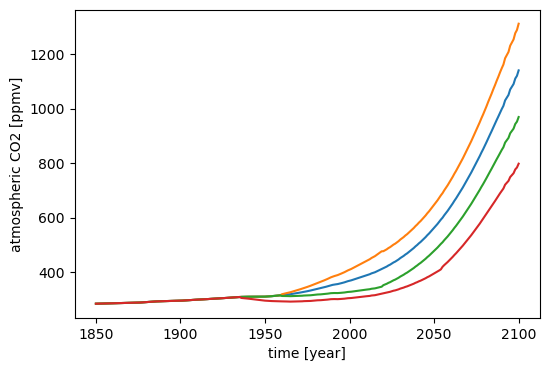

In [ ]:
plt.figure(figsize=(6,4))
base.A_co2.plot()
increment_15.A_co2.plot()
decrement_15.A_co2.plot()
decrement_30.A_co2.plot()

In [ ]:
decr_30_pre = base_ccn.sel(time=slice(1765.,2100.))
decr_30 = base_ccn.sel(time=slice(2101.,2500.))

lis_decr_30 = np.arange(0.01,4.01,0.01)

decr_30 = - decr_30 * lis_decr_30

decrement_30 = base_ccn.where((base_ccn.time >= 2101.) & (base_ccn.time <= 2500.)) + decr_30

decrement_30_fin = decr_30_pre.combine_first(decrement_30)

In [ ]:
# 05% increment

In [ ]:
incr_05_pre = base_ccn.sel(time=slice(1765.,2015.))
incr_05 = base_ccn.sel(time=slice(2016.,2055.))
incr_05_post = base_ccn.sel(time=slice(2056.,2500.))

In [ ]:
lis_incr_05 = np.arange(0.01,0.11,0.0025)

In [ ]:
incr_05 = incr_05 * lis_incr_05
post_incr_05 = incr_05_post / 100 * 10

In [ ]:
incr_05 = base_ccn.where((base_ccn.time >= 2016.) & (base_ccn.time <= 2055.)) + incr_05
post_incr_05 = base_ccn.where((base_ccn.time >= 2056.) & (base_ccn.time <= 2500.)) + post_incr_05

In [ ]:
increment_05 = incr_05.combine_first(post_incr_05)
increment_05_fin = incr_05_pre.combine_first(increment_05)

In [ ]:
# 05% decrement

In [ ]:
decr_05_pre = base_ccn.sel(time=slice(1765.,2015.))
decr_05 = base_ccn.sel(time=slice(2016.,2055.))
decr_05_post = base_ccn.sel(time=slice(2056.,2500.))

In [ ]:
lis_decr_05 = np.arange(0.01,0.11,0.0025)

In [ ]:
decr_05 = - decr_05 * lis_decr_05
post_decr_05 = - decr_05_post / 100 * 10

In [ ]:
decr_05 = base_ccn.where((base_ccn.time >= 2016.) & (base_ccn.time <= 2055.)) + decr_05
post_decr_05 = base_ccn.where((base_ccn.time >= 2056.) & (base_ccn.time <= 2500.)) + post_decr_05

In [ ]:
decrement_05 = decr_05.combine_first(post_decr_05)
decrement_05_fin = decr_05_pre.combine_first(decrement_05)

In [ ]:
# decrement

In [ ]:
decr_30_pre = base_ccn.sel(time=slice(1765.,2015.))
decr_30 = base_ccn.sel(time=slice(2016.,2045.))
decr_30_post = base_ccn.sel(time=slice(2046.,2500.))

In [ ]:
lis_decr_30 = np.arange(0.01,0.31,0.01)

In [ ]:
decr_30 = - decr_30 * lis_decr_30
post_decr_30 = - decr_30_post / 100 * 30

In [ ]:
decr_30 = base_ccn.where((base_ccn.time >= 2016.) & (base_ccn.time <= 2045.)) + decr_30
post_decr_30 = base_ccn.where((base_ccn.time >= 2046.) & (base_ccn.time <= 2500.)) + post_decr_30

In [ ]:
decrement_30 = decr_30.combine_first(post_decr_30)
decrement_30_fin = decr_30_pre.combine_first(decrement_30)

In [ ]:
datasets = [increment_05_fin, decrement_05_fin, decrement_30_fin, base_ccn]
newdata = []

for dataset in datasets:
    dataset = dataset.sel(time=slice(1850.,2100.))
    newdata.append(dataset)

In [ ]:
increment_05 = newdata[0]
decrement_05 = newdata[1]
decrement_30 = newdata[2]
base = newdata[3]

In [ ]:
example = xr.open_dataset('/Users/chiaraciscato/Downloads/A_co2_1850-2200.nc', decode_times=False)

In [ ]:
# increment

In [ ]:
incr_pre = example.sel(time=slice(1765.,2019.))
incr = example.sel(time=slice(2020.,2200.))

In [ ]:
lis_incr = np.arange(.01,.46,.0025)

In [ ]:
incr = incr * lis_incr

In [ ]:
incr = example.where((example.time >= 2020.) & (example.time <= 2200.)) + incr

In [ ]:
incr_fin = incr_pre.combine_first(incr)

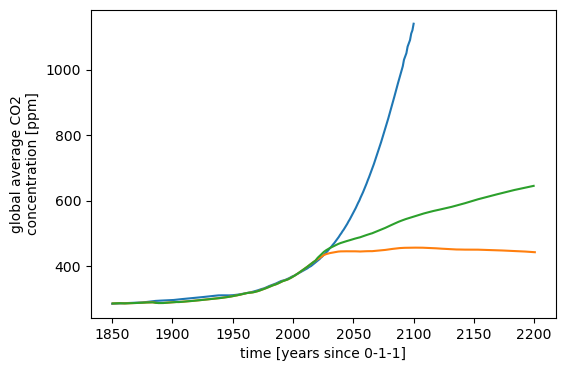

In [ ]:
plt.figure(figsize=(6,4))
rcp45.A_co2.plot()
ssp1.A_co2.plot()
incr_fin.A_co2.plot()